# FMRI DATA ANALYSIS - NARPS DATASET BY TEAM 0I4U

**Pipeline description**

- **General workflow** : All Pre-processing steps were performed using SPM12 
    - 1. Realign (to first) and unwarp using provided fieldmap (vdm5 computed)--> use magnitude w shorter echo time because it will have greater signal 
    - 2. Co-registration to structural scan 
    - 3. Segmentation and spatial normalization of structural data to MNI space using Segment function 
    - 4. Application of the normalization parameters (iy) from step 3 to the co-registered functional data 
    - 5. Masking of non-grey matter voxels in normalized functional data using binary downsampled wc1 images (>0.2 threshold) 
    - 6. Smoothing with Gaussian kernel of 5 mm FWHM
- **Segmentation** function in SPM12
- Default **realign and unwarp** in SPM12 including fieldmap based distortion correction: Rigid body Register to first 4th Degree B-Spline
- Distortion correction as integrated in realign- and unwarp in SPM12 using default parameters including a precomputed phase map
- Volume based **registration** to MNI space using normalization parameters (iy) derived from T1 scan using Segment function (default paramters) in SPM12 (comprises distortion correction) 
    - final resolution is 1.5 mm isotropic 	
- Bias correction for T1 as default in the SPM12 segment utility	
- 6 motion parameters were included into the first level analyses	
- No censoring applied	
- Smoothing using a Gaussian kernel of 5 mm FWHM (Smooth function in SPM)	

- No subjects or time poins excluded (all 4 sessions each 453 frames for all 108 subjects used)	
- Analyses were restricted to a grey matter mask extracted from another dataset to exclude white matter regions from analyses	
- All in SPM12:  
    - Event-related design, 4 within subject sessions 
    - 1 Condition: Stimulus presentation, onsets based on tsv file, duration 4 seconds 
        - 2 Parametric modulators: Gain and loss modelled with 1st order polynomial expansion 
    - 1 Condition: button press, onsets based on tsv file, duration 0 seconds 
    - Standard 6 motion parameters included as regressors per session 
    - HRF: Canonical plus temporal derivative Explicit grey matter mask applied, No other masking thresholds Serial correlation: AR(1) 
    - All other parameters as default 2 T-contrasts generated modelling positive effect of gain and loss per subject across all sessions	onset	1	
    - Separate one sample t-tests for gain, loss for each group (equal Ind, equal Range) including age and sex as covariates to test for parametric effects of gain and loss in each group (Hypotheses 1-8) 
    - Two-sample t-tests (with age and sex as covariates) to compare equal Range vs equal Indifference (Hypothesis 9) 	
    - Mass Univariate for 1st level s. above. For 2nd level: Random effect SPM default second level (one-sample t-tests for hypotheses 1-8 and two-sample t-test for hypothesis 9), age and sex included as covariates 
    - Unequal variance between groups assumed 	
    - 1st level: two t-contrast contrasts generated: positive effect of gain and positive effect of loss per subject across all sessions) 
    - 2nd level: first level con maps entered into 2nd level. 
        - According to the respective hypothesis t-contrast for positive or negative effect of gain loss (hypotheses 1-8) or t-contrast for group comparison (hypothesis 9) Whole brain FWE correction performed on voxel-level for all 2nd level analyses. Masks described above were applied to test for whole-brain significant effects in specified regions as based on the hypotheses.
        
**To use this notebook :** 
- Download fMRIprep datas available [**here**](https://openneuro.org/datasets/ds001734/versions/1.0.4) or in [**datalad**](http://datasets.datalad.org/?dir=/workshops/nih-2017/ds001734).
- Modify the paths:
    - **exp_dir**: directory where the ds001734-download repository is stored
    - **result_dir**: directory where the intermediate and final repositories will be stored
    - **working_dir**: name of the directory where intermediate results will be stored
    - **output_dir**: name of the directory where final results will be stored
    
- Select the number of subject you want to use by changing the value of the **nsub** variable.
    - For preprocessing & l1 analysis, all subjects will be analyzed. 
    - For l2 analysis, if **nsub < 108**, the required number of subject will be randomly selected from the dataset.

Botvinik-Nezer, R., Holzmeister, F., Camerer, C.F., Dreber, A., Huber, J., Johannesson, M., Kirchler, M., Iwanir, R., Mumford, J.A., ..., Nichols, T.E., Poldrack, R.A., Schonberg, T. (2020). Variability in the analysis of a single neuroimaging dataset by many teams. Nature. https://doi.org/10.1038/s41586-020-2314-9.

In [3]:
# Set the path to matlab 
## NECESSARY TO USE SPM
from nipype.interfaces import spm
matlab_cmd = '/opt/spm12-r7771/run_spm12.sh /opt/matlabmcr-2010a/v713/ script'
spm.SPMCommand.set_mlab_paths(matlab_cmd=matlab_cmd, use_mcr=True)

stty: 'standard input': Inappropriate ioctl for device


In [4]:
from lib import pipelines_0I4U

from nilearn import plotting
%matplotlib inline
from os.path import join as opj
import os
import json

/opt/miniconda-latest/envs/neuro/lib/python3.8/site-packages/nilearn/datasets/__init__.py:93: FutureWarning: Fetchers from the nilearn.datasets module will be updated in version 0.9 to return python strings instead of bytes and Pandas dataframes instead of Numpy arrays.
  warn("Fetchers from the nilearn.datasets module will be "


In [5]:
team_ID = "0I4U"
# Important directories
## exp_dir : where the data are stored (where the ds001734 directory is stored)
exp_dir = '/data/ds001734-download'

## result_dir : where the intermediate and final results will be store
result_dir = "/home/analytic_variability_fmri/data/derived/reproduced"

## working_dir : where the intermediate outputs will be store
working_dir = f"NARPS-{team_ID}-reproduced/intermediate_results"

## output_dir : where the final results will be store
output_dir = f"NARPS-{team_ID}-reproduced"

/local/egermani/miniconda3/envs/workEnv/lib/python3.8/site-packages/nilearn/_utils/niimg.py:61: UserWarning: Non-finite values detected. These values will be replaced with zeros.
  warn(


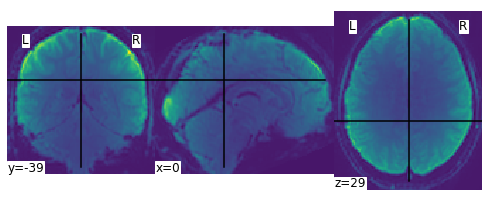

In [3]:
from nilearn import plotting, image
plotting.plot_img(image.mean_img('/local/egermani/analytic_variability_fmri/data/derived/reproduced/NARPS-0I4U-reproduced/preprocess/_run_id_01_subject_id_001/wusub-001_task-MGT_run-01_bold.nii'))

In [1]:
import nibabel as nib
img = nib.load('/home/analytic_variability_fmri/data/derived/reproduced/NARPS-0I4U-reproduced/preprocess/_run_id_01_subject_id_001/wusub-001_task-MGT_run-01_bold.nii')
img.shape

(105, 127, 105, 453)

In [2]:
nib.load('/opt/spm12-r7771/spm12_mcr/spm12/tpm/TPM.nii').shape

(121, 145, 121, 6)

/opt/miniconda-latest/envs/neuro/lib/python3.8/site-packages/nilearn/_utils/niimg.py:61: UserWarning: Non-finite values detected. These values will be replaced with zeros.
  warn(


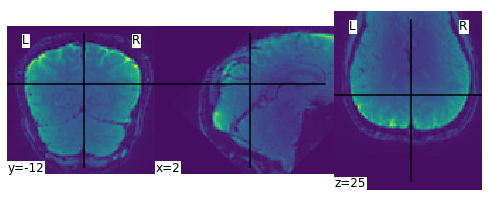

In [38]:
plotting.plot_img(image.mean_img('/home/analytic_variability_fmri/data/derived/reproduced/NARPS-0I4U-reproduced/preprocess/_run_id_01_subject_id_001/wusub-001_task-MGT_run-01_bold.nii'))

In [39]:
import nibabel as nib

img = nib.load('/home/analytic_variability_fmri/data/derived/reproduced/NARPS-0I4U-reproduced/preprocess/_run_id_01_subject_id_001/wusub-001_task-MGT_run-01_bold.nii')
img.shape

(105, 127, 105, 453)

In [6]:
dir_list = os.listdir(exp_dir)

# Subject list (to which we will do the analysis)
subject_list = []
for dirs in dir_list:
    if dirs[0:3] == 'sub':
        subject_list.append(dirs[-3:])

In [7]:
subject_list = sorted(subject_list)[0:1]
n_sub = len(subject_list)

# Run to use for this analysis
run_list = ['01', '02', '03', '04']

#TR
with open(opj(exp_dir, 'task-MGT_bold.json'), 'rt') as fp:
    task_info = json.load(fp)
TR = task_info['RepetitionTime']
ST = task_info['SliceTiming']
ET = task_info["EffectiveEchoSpacing"]

N = len(ST)
TA = TR/N
total_readout_time = N * ET

fwhm = 5

In [8]:
from nipype.interfaces.utility import IdentityInterface, Function
from nipype.interfaces.io import SelectFiles, DataSink
from nipype.interfaces.fsl import ApplyMask
from nipype import Workflow, Node, MapNode, JoinNode

def compute_mask(wc1_files, result_dir, working_dir, threshold):
    import nibabel as nib
    import numpy as np
    from os.path import join as opj
    
    wc1_data = []
    
    for files in wc1_files:
        img = nib.load(files)
        img_affine = img.affine
        wc1_data.append(img.get_fdata())
        
    wc1_mask = np.mean(wc1_data, axis = 0) > 0.2
    wc1_mask = wc1_mask.astype(int)

    wc1_mask_img = nib.Nifti1Image(wc1_mask, img_affine)
    
    mask_fname = opj(result_dir, working_dir, 'mask', 'wc1_common.nii')
    
    nib.save(wc1_mask_img, mask_fname)
    
    return mask_fname
    
def apply_mask(mask_fname, normalized_files, result_dir, working_dir):
    from nilearn import image
    from os.path import join as opj
    import nibabel as nib
    import numpy as np
    from nilearn import plotting
    
    mask = nib.load(mask_fname)
    normalized_img = [nib.load(img) for img in normalized_files]
    
    for img in normalized_img:
        img_resampled = image.resample_to_img(img, mask)
        img_masked = img_resampled.get_fdata() * mask.get_fdata()
        img_affine = img_resampled.affine()
        
        img_nifti = nib.Nifti1Image(img_masked, img_affine)
        plotting.plot_img(image.mean_img(img_nifti))

def get_mask_reslice(exp_dir, result_dir, working_dir, output_dir, subject_list, run_list):
    wc1_files = opj(result_dir, output_dir, 'preprocess' , '_run_id_01_subject_id_*', 'wc1sub-*_T1w.nii')
    normalized_files = opj(result_dir, output_dir, 'preprocess' , '_run_id_01_subject_id_*', 'wusub-*_task-MGT_run-*_bold.nii')
    
    template = {'wc1' : wc1_files, 'normalized' : normalized_files}

    # SelectFiles node - to select necessary files
    selectfiles_mask = Node(SelectFiles(template, base_directory=result_dir), name = 'selectfiles_mask')
    
    mask = Node(Function(input_names = ['wc1_files', 'result_dir', 'working_dir', 'threshold'], 
                           output_names = ['mask_fname'], function = compute_mask), name = 'mask')
    
    
    


['001',
 '002',
 '003',
 '004',
 '005',
 '006',
 '008',
 '009',
 '010',
 '011',
 '013',
 '014',
 '015',
 '016',
 '017',
 '018',
 '019',
 '020',
 '021',
 '022']

In [10]:
import importlib
importlib.reload(pipelines_0I4U)
preprocessing = pipelines_0I4U.get_preprocessing(exp_dir, result_dir, working_dir, output_dir, subject_list, run_list, fwhm, TR, 
                      total_readout_time)

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


In [11]:
preprocessing.run('MultiProc', plugin_args={'n_procs': 8})

220125-09:33:49,143 nipype.workflow INFO:
	 Workflow preprocessing settings: ['check', 'execution', 'logging', 'monitoring']
220125-09:33:49,350 nipype.workflow INFO:
	 Running in parallel.
220125-09:33:49,356 nipype.workflow INFO:
	 [MultiProc] Running 0 tasks, and 4 jobs ready. Free memory (GB): 113.27/113.27, Free processors: 8/8.
220125-09:33:49,516 nipype.workflow INFO:
	 [Node] Setting-up "preprocessing.selectfiles_preproc" in "/home/analytic_variability_fmri/data/derived/reproduced/NARPS-0I4U-reproduced/intermediate_results/preprocessing/_run_id_01_subject_id_001/selectfiles_preproc".
220125-09:33:49,519 nipype.workflow INFO:
	 [Node] Setting-up "preprocessing.selectfiles_preproc" in "/home/analytic_variability_fmri/data/derived/reproduced/NARPS-0I4U-reproduced/intermediate_results/preprocessing/_run_id_02_subject_id_001/selectfiles_preproc".
220125-09:33:49,522 nipype.workflow INFO:
	 [Node] Setting-up "preprocessing.selectfiles_preproc" in "/home/analytic_variability_fmri/data

220125-09:33:57,480 nipype.workflow INFO:
	 [Node] Executing "fieldmap" <nipype.interfaces.spm.preprocess.FieldMap>
220125-09:33:59,366 nipype.workflow INFO:
	 [MultiProc] Running 5 tasks, and 3 jobs ready. Free memory (GB): 112.27/113.27, Free processors: 3/8.
                     Currently running:
                       * preprocessing.fieldmap
                       * preprocessing.seg
                       * preprocessing.seg
                       * preprocessing.seg
                       * preprocessing.seg
220125-09:33:59,452 nipype.workflow INFO:
	 [Node] Outdated cache found for "preprocessing.fieldmap".
220125-09:33:59,458 nipype.workflow INFO:
	 [Node] Setting-up "preprocessing.fieldmap" in "/home/analytic_variability_fmri/data/derived/reproduced/NARPS-0I4U-reproduced/intermediate_results/preprocessing/_run_id_02_subject_id_001/fieldmap".
220125-09:33:59,460 nipype.workflow INFO:
	 [Node] Outdated cache found for "preprocessing.fieldmap".
220125-09:33:59,462 nipype.workfl

stty: stty: 'standard input''standard input': Inappropriate ioctl for device
: Inappropriate ioctl for device
stty: stty: 'standard input''standard input'stty: 'standard input': Inappropriate ioctl for device
: Inappropriate ioctl for device
: Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


220125-09:34:35,414 nipype.workflow INFO:
	 [Node] Finished "fieldmap", elapsed time 29.502519s.


stty: 'standard input': Inappropriate ioctl for device


220125-09:34:37,402 nipype.workflow INFO:
	 [Job 34] Completed (preprocessing.fieldmap).
220125-09:34:37,405 nipype.workflow INFO:
	 [MultiProc] Running 7 tasks, and 1 jobs ready. Free memory (GB): 111.87/113.27, Free processors: 1/8.
                     Currently running:
                       * preprocessing.fieldmap
                       * preprocessing.fieldmap
                       * preprocessing.fieldmap
                       * preprocessing.seg
                       * preprocessing.seg
                       * preprocessing.seg
                       * preprocessing.seg
220125-09:34:37,480 nipype.workflow INFO:
	 [Node] Setting-up "preprocessing.motion_correction" in "/home/analytic_variability_fmri/data/derived/reproduced/NARPS-0I4U-reproduced/intermediate_results/preprocessing/_run_id_03_subject_id_001/motion_correction".
220125-09:34:38,542 nipype.workflow INFO:
	 [Node] Executing "motion_correction" <nipype.interfaces.spm.preprocess.RealignUnwarp>
220125-09:34:39,405 

stty: 'standard input': Inappropriate ioctl for device


220125-09:34:42,972 nipype.workflow INFO:
	 [Node] Finished "fieldmap", elapsed time 37.071579s.


stty: 'standard input': Inappropriate ioctl for device


220125-09:34:43,408 nipype.workflow INFO:
	 [Job 32] Completed (preprocessing.fieldmap).
220125-09:34:43,410 nipype.workflow INFO:
	 [Job 33] Completed (preprocessing.fieldmap).
220125-09:34:43,413 nipype.workflow INFO:
	 [MultiProc] Running 6 tasks, and 2 jobs ready. Free memory (GB): 112.07/113.27, Free processors: 2/8.
                     Currently running:
                       * preprocessing.motion_correction
                       * preprocessing.fieldmap
                       * preprocessing.seg
                       * preprocessing.seg
                       * preprocessing.seg
                       * preprocessing.seg
220125-09:34:43,485 nipype.workflow INFO:
	 [Node] Setting-up "preprocessing.motion_correction" in "/home/analytic_variability_fmri/data/derived/reproduced/NARPS-0I4U-reproduced/intermediate_results/preprocessing/_run_id_01_subject_id_001/motion_correction".
220125-09:34:43,486 nipype.workflow INFO:
	 [Node] Setting-up "preprocessing.motion_correction" in "

stty: 'standard input': Inappropriate ioctl for device


220125-09:34:44,531 nipype.workflow INFO:
	 [Node] Executing "motion_correction" <nipype.interfaces.spm.preprocess.RealignUnwarp>
220125-09:34:44,656 nipype.workflow INFO:
	 [Node] Executing "motion_correction" <nipype.interfaces.spm.preprocess.RealignUnwarp>
220125-09:34:45,411 nipype.workflow INFO:
	 [Job 35] Completed (preprocessing.fieldmap).
220125-09:34:45,415 nipype.workflow INFO:
	 [MultiProc] Running 7 tasks, and 1 jobs ready. Free memory (GB): 111.87/113.27, Free processors: 1/8.
                     Currently running:
                       * preprocessing.motion_correction
                       * preprocessing.motion_correction
                       * preprocessing.motion_correction
                       * preprocessing.seg
                       * preprocessing.seg
                       * preprocessing.seg
                       * preprocessing.seg
220125-09:34:45,508 nipype.workflow INFO:
	 [Node] Setting-up "preprocessing.motion_correction" in "/home/analytic_variabi

stty: 'standard input': Inappropriate ioctl for device


220125-09:39:01,242 nipype.workflow INFO:
	 [Node] Finished "seg", elapsed time 295.33062s.


stty: 'standard input': Inappropriate ioctl for device


220125-09:39:01,679 nipype.workflow INFO:
	 [Job 26] Completed (preprocessing.seg).
220125-09:39:01,682 nipype.workflow INFO:
	 [Job 29] Completed (preprocessing.seg).
220125-09:39:01,685 nipype.workflow INFO:
	 [MultiProc] Running 6 tasks, and 0 jobs ready. Free memory (GB): 112.07/113.27, Free processors: 2/8.
                     Currently running:
                       * preprocessing.motion_correction
                       * preprocessing.motion_correction
                       * preprocessing.motion_correction
                       * preprocessing.motion_correction
                       * preprocessing.seg
                       * preprocessing.seg
220125-09:39:17,775 nipype.workflow INFO:
	 [Node] Finished "seg", elapsed time 311.87477s.


stty: 'standard input': Inappropriate ioctl for device


220125-09:39:19,698 nipype.workflow INFO:
	 [Job 23] Completed (preprocessing.seg).
220125-09:39:19,701 nipype.workflow INFO:
	 [MultiProc] Running 5 tasks, and 0 jobs ready. Free memory (GB): 112.27/113.27, Free processors: 3/8.
                     Currently running:
                       * preprocessing.motion_correction
                       * preprocessing.motion_correction
                       * preprocessing.motion_correction
                       * preprocessing.motion_correction
                       * preprocessing.seg
220125-09:39:21,356 nipype.workflow INFO:
	 [Node] Finished "seg", elapsed time 315.392639s.


stty: 'standard input': Inappropriate ioctl for device


220125-09:39:21,700 nipype.workflow INFO:
	 [Job 20] Completed (preprocessing.seg).
220125-09:39:21,703 nipype.workflow INFO:
	 [MultiProc] Running 4 tasks, and 0 jobs ready. Free memory (GB): 112.47/113.27, Free processors: 4/8.
                     Currently running:
                       * preprocessing.motion_correction
                       * preprocessing.motion_correction
                       * preprocessing.motion_correction
                       * preprocessing.motion_correction


Process ForkProcess-16:
Process ForkProcess-15:
Process ForkProcess-14:
Process ForkProcess-13:


KeyboardInterrupt: 

Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
  File "/opt/miniconda-latest/envs/neuro/lib/python3.8/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/opt/miniconda-latest/envs/neuro/lib/python3.8/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/opt/miniconda-latest/envs/neuro/lib/python3.8/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/opt/miniconda-latest/envs/neuro/lib/python3.8/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/opt/miniconda-latest/envs/neuro/lib/python3.8/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/opt/miniconda-latest/envs/neuro/lib/python3.8/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/opt/miniconda-latest/envs/neuro/lib/python3.8/concurrent/futures/process.py"

### 1st level analysis (Subject level)

In [8]:
l1_analysis = pipelines_0I4U.get_l1_analysis(subject_list, TR, run_list, exp_dir, result_dir,
                                             working_dir, output_dir)

In [57]:
l1_analysis.run('MultiProc', plugin_args={'n_procs': 16})

211221-17:26:48,776 nipype.workflow INFO:
	 Workflow l1_analysis settings: ['check', 'execution', 'logging', 'monitoring']
211221-17:26:48,917 nipype.workflow INFO:
	 Running in parallel.
211221-17:26:48,921 nipype.workflow INFO:
	 [MultiProc] Running 0 tasks, and 2 jobs ready. Free memory (GB): 113.27/113.27, Free processors: 16/16.
211221-17:26:49,190 nipype.workflow INFO:
	 [Job 1] Cached (l1_analysis.contrasts).
211221-17:26:49,191 nipype.workflow INFO:
	 [Node] Setting-up "l1_analysis.selectfiles" in "/home/analytic_variability_fmri/data/derived/reproduced/NARPS-0I4U-reproduced/intermediate_results/l1_analysis/_subject_id_002/selectfiles".
211221-17:26:49,200 nipype.workflow INFO:
	 [Node] Executing "selectfiles" <nipype.interfaces.io.SelectFiles>
211221-17:26:49,292 nipype.workflow INFO:
	 [Node] Finished "selectfiles", elapsed time 0.087721s.
211221-17:26:50,923 nipype.workflow INFO:
	 [Job 0] Completed (l1_analysis.selectfiles).
211221-17:26:50,927 nipype.workflow INFO:
	 [Mult

stty: 'standard input': Inappropriate ioctl for device


211221-17:27:59,718 nipype.workflow INFO:
	 [Node] Finished "l1_design", elapsed time 61.714694s.


stty: 'standard input': Inappropriate ioctl for device


211221-17:28:00,994 nipype.workflow INFO:
	 [Job 4] Completed (l1_analysis.l1_design).
211221-17:28:00,998 nipype.workflow INFO:
	 [MultiProc] Running 0 tasks, and 1 jobs ready. Free memory (GB): 113.27/113.27, Free processors: 16/16.
211221-17:28:01,94 nipype.workflow INFO:
	 [Node] Outdated cache found for "l1_analysis.l1_estimate".
211221-17:28:01,99 nipype.workflow INFO:
	 [Node] Setting-up "l1_analysis.l1_estimate" in "/home/analytic_variability_fmri/data/derived/reproduced/NARPS-0I4U-reproduced/intermediate_results/l1_analysis/_subject_id_002/l1_estimate".
211221-17:28:01,103 nipype.workflow INFO:
	 [Node] Outdated cache found for "l1_analysis.l1_estimate".
211221-17:28:01,207 nipype.workflow INFO:
	 [Node] Executing "l1_estimate" <nipype.interfaces.spm.model.EstimateModel>
211221-17:28:02,996 nipype.workflow INFO:
	 [MultiProc] Running 1 tasks, and 0 jobs ready. Free memory (GB): 113.07/113.27, Free processors: 15/16.
                     Currently running:
                     

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


211221-17:36:40,807 nipype.workflow INFO:
	 [Node] Finished "l1_estimate", elapsed time 517.411064s.
211221-17:36:41,527 nipype.workflow INFO:
	 [Job 5] Completed (l1_analysis.l1_estimate).
211221-17:36:41,532 nipype.workflow INFO:
	 [MultiProc] Running 0 tasks, and 1 jobs ready. Free memory (GB): 113.27/113.27, Free processors: 16/16.
211221-17:36:41,679 nipype.workflow INFO:
	 [Node] Outdated cache found for "l1_analysis.contrast_estimate".
211221-17:36:41,694 nipype.workflow INFO:
	 [Node] Setting-up "l1_analysis.contrast_estimate" in "/home/analytic_variability_fmri/data/derived/reproduced/NARPS-0I4U-reproduced/intermediate_results/l1_analysis/_subject_id_002/contrast_estimate".
211221-17:36:41,697 nipype.workflow INFO:
	 [Node] Outdated cache found for "l1_analysis.contrast_estimate".
211221-17:36:41,767 nipype.workflow INFO:
	 [Node] Executing "contrast_estimate" <nipype.interfaces.spm.model.EstimateContrast>
211221-17:36:43,532 nipype.workflow INFO:
	 [MultiProc] Running 1 tasks

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


211221-17:37:00,481 nipype.workflow INFO:
	 [Node] Finished "contrast_estimate", elapsed time 16.224283s.
211221-17:37:01,547 nipype.workflow INFO:
	 [Job 6] Completed (l1_analysis.contrast_estimate).
211221-17:37:01,551 nipype.workflow INFO:
	 [MultiProc] Running 0 tasks, and 1 jobs ready. Free memory (GB): 113.27/113.27, Free processors: 16/16.
211221-17:37:01,648 nipype.workflow INFO:
	 [Node] Outdated cache found for "l1_analysis.datasink".
211221-17:37:01,655 nipype.workflow INFO:
	 [Node] Setting-up "l1_analysis.datasink" in "/home/analytic_variability_fmri/data/derived/reproduced/NARPS-0I4U-reproduced/intermediate_results/l1_analysis/_subject_id_002/datasink".
211221-17:37:01,658 nipype.workflow INFO:
	 [Node] Outdated cache found for "l1_analysis.datasink".
211221-17:37:01,665 nipype.workflow INFO:
	 [Node] Executing "datasink" <nipype.interfaces.io.DataSink>
211221-17:37:02,551 nipype.workflow INFO:
	 [Node] Finished "datasink", elapsed time 0.882426s.
211221-17:37:03,551 nipy

In [6]:
contrast_list = ['01', '02']
method = 'equalRange'

l2_analysis_equalRange = pipelines_0I4U.get_l2_analysis(subject_list, n_sub, contrast_list, method, exp_dir, 
                                                        result_dir, working_dir, output_dir)

stty: 'standard input': Inappropriate ioctl for device


211219-09:48:52,882 nipype.workflow INFO:
	 Generated workflow graph: /home/analytic_variability_fmri/data/derived/reproduced/NARPS-0I4U-reproduced/intermediate_results/l2_analysis_equalRange_nsub_108/graph.png (graph2use=colored, simple_form=True).


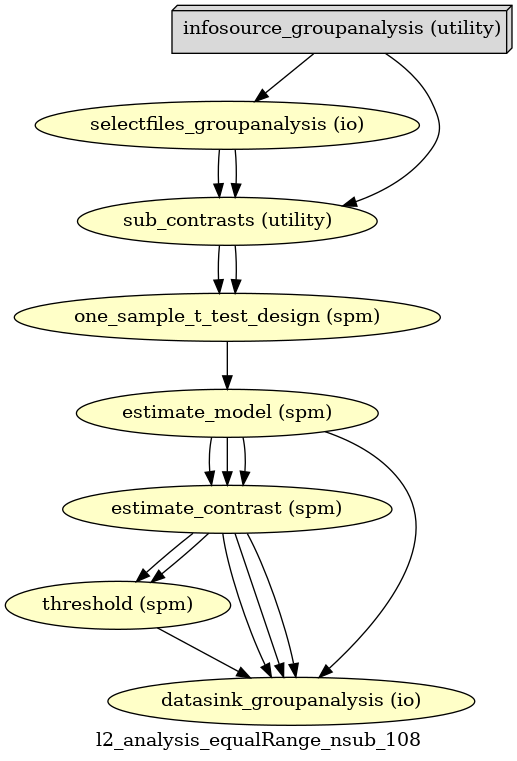

In [8]:
# Create analysis output graph
l2_analysis_equalRange.write_graph(graph2use='colored', format='png', simple_form=True)


# Visualize the graph
from IPython.display import Image
Image(filename=opj(l2_analysis_equalRange.base_dir, 'l2_analysis_equalRange_nsub_108', 'graph.png'))

In [9]:
l2_analysis_equalRange.run('MultiProc', plugin_args={'n_procs': 8})

211219-09:49:03,986 nipype.workflow INFO:
	 Workflow l2_analysis_equalRange_nsub_108 settings: ['check', 'execution', 'logging', 'monitoring']
211219-09:49:04,45 nipype.workflow INFO:
	 Running in parallel.
211219-09:49:04,50 nipype.workflow INFO:
	 [MultiProc] Running 0 tasks, and 2 jobs ready. Free memory (GB): 113.27/113.27, Free processors: 8/8.
211219-09:49:04,221 nipype.workflow INFO:
	 [Node] Setting-up "l2_analysis_equalRange_nsub_108.selectfiles_groupanalysis" in "/home/analytic_variability_fmri/data/derived/reproduced/NARPS-0I4U-reproduced/intermediate_results/l2_analysis_equalRange_nsub_108/_contrast_id_02/selectfiles_groupanalysis".
211219-09:49:04,220 nipype.workflow INFO:
	 [Node] Setting-up "l2_analysis_equalRange_nsub_108.selectfiles_groupanalysis" in "/home/analytic_variability_fmri/data/derived/reproduced/NARPS-0I4U-reproduced/intermediate_results/l2_analysis_equalRange_nsub_108/_contrast_id_01/selectfiles_groupanalysis".
211219-09:49:04,233 nipype.workflow INFO:
	 [N

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


211219-09:49:22,2 nipype.workflow INFO:
	 [Node] Finished "one_sample_t_test_design", elapsed time 11.336128s.
211219-09:49:22,60 nipype.workflow INFO:
	 [Node] Finished "one_sample_t_test_design", elapsed time 11.583946s.
211219-09:49:22,68 nipype.workflow INFO:
	 [Job 5] Completed (l2_analysis_equalRange_nsub_108.one_sample_t_test_design).
211219-09:49:22,72 nipype.workflow INFO:
	 [MultiProc] Running 1 tasks, and 1 jobs ready. Free memory (GB): 113.07/113.27, Free processors: 7/8.
                     Currently running:
                       * l2_analysis_equalRange_nsub_108.one_sample_t_test_design
211219-09:49:22,158 nipype.workflow INFO:
	 [Node] Setting-up "l2_analysis_equalRange_nsub_108.estimate_model" in "/home/analytic_variability_fmri/data/derived/reproduced/NARPS-0I4U-reproduced/intermediate_results/l2_analysis_equalRange_nsub_108/_contrast_id_02/estimate_model".
211219-09:49:22,170 nipype.workflow INFO:
	 [Node] Executing "estimate_model" <nipype.interfaces.spm.model.Est

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


211219-09:49:24,70 nipype.workflow INFO:
	 [Job 4] Completed (l2_analysis_equalRange_nsub_108.one_sample_t_test_design).
211219-09:49:24,73 nipype.workflow INFO:
	 [MultiProc] Running 1 tasks, and 1 jobs ready. Free memory (GB): 113.07/113.27, Free processors: 7/8.
                     Currently running:
                       * l2_analysis_equalRange_nsub_108.estimate_model
211219-09:49:24,156 nipype.workflow INFO:
	 [Node] Setting-up "l2_analysis_equalRange_nsub_108.estimate_model" in "/home/analytic_variability_fmri/data/derived/reproduced/NARPS-0I4U-reproduced/intermediate_results/l2_analysis_equalRange_nsub_108/_contrast_id_01/estimate_model".
211219-09:49:24,165 nipype.workflow INFO:
	 [Node] Executing "estimate_model" <nipype.interfaces.spm.model.EstimateModel>


stty: 'standard input': Inappropriate ioctl for device


211219-09:49:26,73 nipype.workflow INFO:
	 [MultiProc] Running 2 tasks, and 0 jobs ready. Free memory (GB): 112.87/113.27, Free processors: 6/8.
                     Currently running:
                       * l2_analysis_equalRange_nsub_108.estimate_model
                       * l2_analysis_equalRange_nsub_108.estimate_model


stty: 'standard input': Inappropriate ioctl for device


211219-09:49:49,319 nipype.workflow INFO:
	 [Node] Finished "estimate_model", elapsed time 25.210462s.


stty: 'standard input': Inappropriate ioctl for device


211219-09:49:50,97 nipype.workflow INFO:
	 [Job 7] Completed (l2_analysis_equalRange_nsub_108.estimate_model).
211219-09:49:50,103 nipype.workflow INFO:
	 [MultiProc] Running 1 tasks, and 1 jobs ready. Free memory (GB): 113.07/113.27, Free processors: 7/8.
                     Currently running:
                       * l2_analysis_equalRange_nsub_108.estimate_model
211219-09:49:50,186 nipype.workflow INFO:
	 [Node] Setting-up "l2_analysis_equalRange_nsub_108.estimate_contrast" in "/home/analytic_variability_fmri/data/derived/reproduced/NARPS-0I4U-reproduced/intermediate_results/l2_analysis_equalRange_nsub_108/_contrast_id_02/estimate_contrast".
211219-09:49:50,200 nipype.workflow INFO:
	 [Node] Executing "estimate_contrast" <nipype.interfaces.spm.model.EstimateContrast>
211219-09:49:50,238 nipype.workflow INFO:
	 [Node] Finished "estimate_model", elapsed time 24.160162s.


stty: 'standard input': Inappropriate ioctl for device


211219-09:49:52,98 nipype.workflow INFO:
	 [Job 6] Completed (l2_analysis_equalRange_nsub_108.estimate_model).
211219-09:49:52,101 nipype.workflow INFO:
	 [MultiProc] Running 1 tasks, and 1 jobs ready. Free memory (GB): 113.07/113.27, Free processors: 7/8.
                     Currently running:
                       * l2_analysis_equalRange_nsub_108.estimate_contrast
211219-09:49:52,172 nipype.workflow INFO:
	 [Node] Setting-up "l2_analysis_equalRange_nsub_108.estimate_contrast" in "/home/analytic_variability_fmri/data/derived/reproduced/NARPS-0I4U-reproduced/intermediate_results/l2_analysis_equalRange_nsub_108/_contrast_id_01/estimate_contrast".
211219-09:49:52,187 nipype.workflow INFO:
	 [Node] Executing "estimate_contrast" <nipype.interfaces.spm.model.EstimateContrast>


stty: 'standard input': Inappropriate ioctl for device


211219-09:49:54,100 nipype.workflow INFO:
	 [MultiProc] Running 2 tasks, and 0 jobs ready. Free memory (GB): 112.87/113.27, Free processors: 6/8.
                     Currently running:
                       * l2_analysis_equalRange_nsub_108.estimate_contrast
                       * l2_analysis_equalRange_nsub_108.estimate_contrast


stty: 'standard input': Inappropriate ioctl for device


211219-09:50:03,846 nipype.workflow INFO:
	 [Node] Finished "estimate_contrast", elapsed time 11.376226s.


stty: 'standard input': Inappropriate ioctl for device


211219-09:50:04,111 nipype.workflow INFO:
	 [Job 9] Completed (l2_analysis_equalRange_nsub_108.estimate_contrast).
211219-09:50:04,117 nipype.workflow INFO:
	 [MultiProc] Running 1 tasks, and 1 jobs ready. Free memory (GB): 113.07/113.27, Free processors: 7/8.
                     Currently running:
                       * l2_analysis_equalRange_nsub_108.estimate_contrast
211219-09:50:06,63 nipype.workflow INFO:
	 [Node] Finished "estimate_contrast", elapsed time 11.547604s.
211219-09:50:06,114 nipype.workflow INFO:
	 [Job 8] Completed (l2_analysis_equalRange_nsub_108.estimate_contrast).
211219-09:50:06,119 nipype.workflow INFO:
	 [MultiProc] Running 0 tasks, and 3 jobs ready. Free memory (GB): 113.27/113.27, Free processors: 8/8.
211219-09:50:06,197 nipype.workflow INFO:
	 [Node] Setting-up "_threshold0" in "/home/analytic_variability_fmri/data/derived/reproduced/NARPS-0I4U-reproduced/intermediate_results/l2_analysis_equalRange_nsub_108/_contrast_id_02/threshold/mapflow/_threshold0".

stty: 'standard input': Inappropriate ioctl for device


211219-09:50:06,206 nipype.workflow INFO:
	 [Node] Executing "_threshold0" <nipype.interfaces.spm.model.Threshold>
211219-09:50:06,207 nipype.workflow INFO:
	 [Node] Executing "_threshold1" <nipype.interfaces.spm.model.Threshold>
211219-09:50:08,116 nipype.workflow INFO:
	 [MultiProc] Running 2 tasks, and 2 jobs ready. Free memory (GB): 112.87/113.27, Free processors: 6/8.
                     Currently running:
                       * _threshold1
                       * _threshold0
211219-09:50:08,230 nipype.workflow INFO:
	 [Node] Setting-up "_threshold0" in "/home/analytic_variability_fmri/data/derived/reproduced/NARPS-0I4U-reproduced/intermediate_results/l2_analysis_equalRange_nsub_108/_contrast_id_01/threshold/mapflow/_threshold0".
211219-09:50:08,232 nipype.workflow INFO:
	 [Node] Setting-up "_threshold1" in "/home/analytic_variability_fmri/data/derived/reproduced/NARPS-0I4U-reproduced/intermediate_results/l2_analysis_equalRange_nsub_108/_contrast_id_01/threshold/mapflow/_thres

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


211219-09:50:10,117 nipype.workflow INFO:
	 [MultiProc] Running 4 tasks, and 0 jobs ready. Free memory (GB): 112.47/113.27, Free processors: 4/8.
                     Currently running:
                       * _threshold1
                       * _threshold0
                       * _threshold1
                       * _threshold0
211219-09:50:11,872 nipype.workflow INFO:
	 [Node] Finished "_threshold1", elapsed time 3.6316990000000002s.
211219-09:50:11,887 nipype.workflow INFO:
	 [Node] Finished "_threshold1", elapsed time 3.497847s.


stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


211219-09:50:12,119 nipype.workflow INFO:
	 [Job 15] Completed (_threshold1).
211219-09:50:12,121 nipype.workflow INFO:
	 [Job 17] Completed (_threshold1).
211219-09:50:12,123 nipype.workflow INFO:
	 [MultiProc] Running 2 tasks, and 0 jobs ready. Free memory (GB): 112.87/113.27, Free processors: 6/8.
                     Currently running:
                       * _threshold0
                       * _threshold0
211219-09:50:12,141 nipype.workflow INFO:
	 [Node] Finished "_threshold0", elapsed time 3.901462s.
211219-09:50:12,453 nipype.workflow INFO:
	 [Node] Finished "_threshold0", elapsed time 3.8293s.


stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


211219-09:50:14,122 nipype.workflow INFO:
	 [Job 14] Completed (_threshold0).
211219-09:50:14,125 nipype.workflow INFO:
	 [Job 16] Completed (_threshold0).
211219-09:50:14,129 nipype.workflow INFO:
	 [MultiProc] Running 0 tasks, and 2 jobs ready. Free memory (GB): 113.27/113.27, Free processors: 8/8.
211219-09:50:14,235 nipype.workflow INFO:
	 [Node] Setting-up "_threshold0" in "/home/analytic_variability_fmri/data/derived/reproduced/NARPS-0I4U-reproduced/intermediate_results/l2_analysis_equalRange_nsub_108/_contrast_id_01/threshold/mapflow/_threshold0".
211219-09:50:14,238 nipype.workflow INFO:
	 [Node] Setting-up "_threshold0" in "/home/analytic_variability_fmri/data/derived/reproduced/NARPS-0I4U-reproduced/intermediate_results/l2_analysis_equalRange_nsub_108/_contrast_id_02/threshold/mapflow/_threshold0".
211219-09:50:14,240 nipype.workflow INFO:
	 [Node] Cached "_threshold0" - collecting precomputed outputs
211219-09:50:14,242 nipype.workflow INFO:
	 [Node] "_threshold0" found cach

In [10]:
contrast_list = ['01', '02']
method = 'equalIndifference'

l2_analysis_equalIndifference = pipelines_0I4U.get_l2_analysis(subject_list, n_sub, contrast_list, method, 
                                                               exp_dir, result_dir, working_dir, output_dir)

In [11]:
l2_analysis_equalIndifference.run('MultiProc', plugin_args={'n_procs': 8})

211219-09:50:27,674 nipype.workflow INFO:
	 Workflow l2_analysis_equalIndifference_nsub_108 settings: ['check', 'execution', 'logging', 'monitoring']
211219-09:50:27,706 nipype.workflow INFO:
	 Running in parallel.
211219-09:50:27,711 nipype.workflow INFO:
	 [MultiProc] Running 0 tasks, and 2 jobs ready. Free memory (GB): 113.27/113.27, Free processors: 8/8.
211219-09:50:27,904 nipype.workflow INFO:
	 [Node] Setting-up "l2_analysis_equalIndifference_nsub_108.selectfiles_groupanalysis" in "/home/analytic_variability_fmri/data/derived/reproduced/NARPS-0I4U-reproduced/intermediate_results/l2_analysis_equalIndifference_nsub_108/_contrast_id_01/selectfiles_groupanalysis".
211219-09:50:27,905 nipype.workflow INFO:
	 [Node] Setting-up "l2_analysis_equalIndifference_nsub_108.selectfiles_groupanalysis" in "/home/analytic_variability_fmri/data/derived/reproduced/NARPS-0I4U-reproduced/intermediate_results/l2_analysis_equalIndifference_nsub_108/_contrast_id_02/selectfiles_groupanalysis".
211219-09

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


211219-09:50:44,920 nipype.workflow INFO:
	 [Node] Finished "one_sample_t_test_design", elapsed time 10.687836s.
211219-09:50:44,948 nipype.workflow INFO:
	 [Node] Finished "one_sample_t_test_design", elapsed time 10.716024s.


stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


211219-09:50:45,730 nipype.workflow INFO:
	 [Job 4] Completed (l2_analysis_equalIndifference_nsub_108.one_sample_t_test_design).
211219-09:50:45,733 nipype.workflow INFO:
	 [Job 5] Completed (l2_analysis_equalIndifference_nsub_108.one_sample_t_test_design).
211219-09:50:45,738 nipype.workflow INFO:
	 [MultiProc] Running 0 tasks, and 2 jobs ready. Free memory (GB): 113.27/113.27, Free processors: 8/8.
211219-09:50:45,848 nipype.workflow INFO:
	 [Node] Setting-up "l2_analysis_equalIndifference_nsub_108.estimate_model" in "/home/analytic_variability_fmri/data/derived/reproduced/NARPS-0I4U-reproduced/intermediate_results/l2_analysis_equalIndifference_nsub_108/_contrast_id_02/estimate_model".
211219-09:50:45,847 nipype.workflow INFO:
	 [Node] Setting-up "l2_analysis_equalIndifference_nsub_108.estimate_model" in "/home/analytic_variability_fmri/data/derived/reproduced/NARPS-0I4U-reproduced/intermediate_results/l2_analysis_equalIndifference_nsub_108/_contrast_id_01/estimate_model".
211219-09:

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


211219-09:51:11,997 nipype.workflow INFO:
	 [Node] Finished "estimate_model", elapsed time 23.713774s.
211219-09:51:12,108 nipype.workflow INFO:
	 [Node] Finished "estimate_model", elapsed time 23.836158s.


stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


211219-09:51:13,758 nipype.workflow INFO:
	 [Job 6] Completed (l2_analysis_equalIndifference_nsub_108.estimate_model).
211219-09:51:13,760 nipype.workflow INFO:
	 [Job 7] Completed (l2_analysis_equalIndifference_nsub_108.estimate_model).
211219-09:51:13,762 nipype.workflow INFO:
	 [MultiProc] Running 0 tasks, and 2 jobs ready. Free memory (GB): 113.27/113.27, Free processors: 8/8.
211219-09:51:13,848 nipype.workflow INFO:
	 [Node] Setting-up "l2_analysis_equalIndifference_nsub_108.estimate_contrast" in "/home/analytic_variability_fmri/data/derived/reproduced/NARPS-0I4U-reproduced/intermediate_results/l2_analysis_equalIndifference_nsub_108/_contrast_id_01/estimate_contrast".
211219-09:51:13,848 nipype.workflow INFO:
	 [Node] Setting-up "l2_analysis_equalIndifference_nsub_108.estimate_contrast" in "/home/analytic_variability_fmri/data/derived/reproduced/NARPS-0I4U-reproduced/intermediate_results/l2_analysis_equalIndifference_nsub_108/_contrast_id_02/estimate_contrast".
211219-09:51:13,86

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


211219-09:51:27,461 nipype.workflow INFO:
	 [Node] Finished "estimate_contrast", elapsed time 11.388959s.


stty: 'standard input': Inappropriate ioctl for device


211219-09:51:27,771 nipype.workflow INFO:
	 [Job 8] Completed (l2_analysis_equalIndifference_nsub_108.estimate_contrast).
211219-09:51:27,774 nipype.workflow INFO:
	 [MultiProc] Running 1 tasks, and 1 jobs ready. Free memory (GB): 113.07/113.27, Free processors: 7/8.
                     Currently running:
                       * l2_analysis_equalIndifference_nsub_108.estimate_contrast
211219-09:51:28,71 nipype.workflow INFO:
	 [Node] Finished "estimate_contrast", elapsed time 11.818806s.


stty: 'standard input': Inappropriate ioctl for device


211219-09:51:29,775 nipype.workflow INFO:
	 [Job 9] Completed (l2_analysis_equalIndifference_nsub_108.estimate_contrast).
211219-09:51:29,780 nipype.workflow INFO:
	 [MultiProc] Running 0 tasks, and 3 jobs ready. Free memory (GB): 113.27/113.27, Free processors: 8/8.
211219-09:51:29,931 nipype.workflow INFO:
	 [Node] Setting-up "_threshold0" in "/home/analytic_variability_fmri/data/derived/reproduced/NARPS-0I4U-reproduced/intermediate_results/l2_analysis_equalIndifference_nsub_108/_contrast_id_01/threshold/mapflow/_threshold0".
211219-09:51:29,934 nipype.workflow INFO:
	 [Node] Setting-up "_threshold1" in "/home/analytic_variability_fmri/data/derived/reproduced/NARPS-0I4U-reproduced/intermediate_results/l2_analysis_equalIndifference_nsub_108/_contrast_id_01/threshold/mapflow/_threshold1".
211219-09:51:29,941 nipype.workflow INFO:
	 [Node] Executing "_threshold0" <nipype.interfaces.spm.model.Threshold>
211219-09:51:29,943 nipype.workflow INFO:
	 [Node] Executing "_threshold1" <nipype.in

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


211219-09:51:33,779 nipype.workflow INFO:
	 [MultiProc] Running 4 tasks, and 0 jobs ready. Free memory (GB): 112.47/113.27, Free processors: 4/8.
                     Currently running:
                       * _threshold1
                       * _threshold0
                       * _threshold1
                       * _threshold0
211219-09:51:35,689 nipype.workflow INFO:
	 [Node] Finished "_threshold1", elapsed time 3.791716s.
211219-09:51:35,779 nipype.workflow INFO:
	 [Job 17] Completed (_threshold1).
211219-09:51:35,781 nipype.workflow INFO:
	 [MultiProc] Running 3 tasks, and 0 jobs ready. Free memory (GB): 112.67/113.27, Free processors: 5/8.
                     Currently running:
                       * _threshold0
                       * _threshold1
                       * _threshold0
211219-09:51:35,811 nipype.workflow INFO:
	 [Node] Finished "_threshold0", elapsed time 3.914594s.


stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


211219-09:51:36,117 nipype.workflow INFO:
	 [Node] Finished "_threshold1", elapsed time 3.755621s.


stty: 'standard input': Inappropriate ioctl for device


211219-09:51:36,320 nipype.workflow INFO:
	 [Node] Finished "_threshold0", elapsed time 3.996528s.


stty: 'standard input': Inappropriate ioctl for device


211219-09:51:37,781 nipype.workflow INFO:
	 [Job 14] Completed (_threshold0).
211219-09:51:37,783 nipype.workflow INFO:
	 [Job 15] Completed (_threshold1).
211219-09:51:37,785 nipype.workflow INFO:
	 [Job 16] Completed (_threshold0).
211219-09:51:37,787 nipype.workflow INFO:
	 [MultiProc] Running 0 tasks, and 2 jobs ready. Free memory (GB): 113.27/113.27, Free processors: 8/8.
211219-09:51:37,954 nipype.workflow INFO:
	 [Node] Setting-up "_threshold0" in "/home/analytic_variability_fmri/data/derived/reproduced/NARPS-0I4U-reproduced/intermediate_results/l2_analysis_equalIndifference_nsub_108/_contrast_id_01/threshold/mapflow/_threshold0".
211219-09:51:37,955 nipype.workflow INFO:
	 [Node] Setting-up "_threshold0" in "/home/analytic_variability_fmri/data/derived/reproduced/NARPS-0I4U-reproduced/intermediate_results/l2_analysis_equalIndifference_nsub_108/_contrast_id_02/threshold/mapflow/_threshold0".
211219-09:51:37,958 nipype.workflow INFO:
	 [Node] Cached "_threshold0" - collecting pre

In [12]:
contrast_list = ['02']
method = 'groupComp'

l2_analysis_groupComp = pipelines_0I4U.get_l2_analysis(subject_list, n_sub, contrast_list, method, exp_dir, 
                                                       result_dir, working_dir, output_dir)

In [13]:
l2_analysis_groupComp.run('MultiProc', plugin_args={'n_procs': 8})

211219-09:51:51,363 nipype.workflow INFO:
	 Workflow l2_analysis_groupComp_nsub_108 settings: ['check', 'execution', 'logging', 'monitoring']
211219-09:51:51,385 nipype.workflow INFO:
	 Running in parallel.
211219-09:51:51,389 nipype.workflow INFO:
	 [MultiProc] Running 0 tasks, and 1 jobs ready. Free memory (GB): 113.27/113.27, Free processors: 8/8.
211219-09:51:51,543 nipype.workflow INFO:
	 [Node] Setting-up "l2_analysis_groupComp_nsub_108.selectfiles_groupanalysis" in "/home/analytic_variability_fmri/data/derived/reproduced/NARPS-0I4U-reproduced/intermediate_results/l2_analysis_groupComp_nsub_108/_contrast_id_02/selectfiles_groupanalysis".
211219-09:51:51,556 nipype.workflow INFO:
	 [Node] Executing "selectfiles_groupanalysis" <nipype.interfaces.io.SelectFiles>
211219-09:51:51,568 nipype.workflow INFO:
	 [Node] Finished "selectfiles_groupanalysis", elapsed time 0.007522s.
211219-09:51:53,394 nipype.workflow INFO:
	 [Job 0] Completed (l2_analysis_groupComp_nsub_108.selectfiles_group

stty: 'standard input': Inappropriate ioctl for device


211219-09:52:07,699 nipype.workflow INFO:
	 [Node] Finished "two_sample_t_test_design", elapsed time 10.010276s.


stty: 'standard input': Inappropriate ioctl for device


211219-09:52:09,407 nipype.workflow INFO:
	 [Job 2] Completed (l2_analysis_groupComp_nsub_108.two_sample_t_test_design).
211219-09:52:09,410 nipype.workflow INFO:
	 [MultiProc] Running 0 tasks, and 1 jobs ready. Free memory (GB): 113.27/113.27, Free processors: 8/8.
211219-09:52:09,487 nipype.workflow INFO:
	 [Node] Setting-up "l2_analysis_groupComp_nsub_108.estimate_model" in "/home/analytic_variability_fmri/data/derived/reproduced/NARPS-0I4U-reproduced/intermediate_results/l2_analysis_groupComp_nsub_108/_contrast_id_02/estimate_model".
211219-09:52:09,496 nipype.workflow INFO:
	 [Node] Executing "estimate_model" <nipype.interfaces.spm.model.EstimateModel>
211219-09:52:11,410 nipype.workflow INFO:
	 [MultiProc] Running 1 tasks, and 0 jobs ready. Free memory (GB): 113.07/113.27, Free processors: 7/8.
                     Currently running:
                       * l2_analysis_groupComp_nsub_108.estimate_model


stty: 'standard input': Inappropriate ioctl for device


211219-09:52:47,997 nipype.workflow INFO:
	 [Node] Finished "estimate_model", elapsed time 36.292724s.


stty: 'standard input': Inappropriate ioctl for device


211219-09:52:49,448 nipype.workflow INFO:
	 [Job 3] Completed (l2_analysis_groupComp_nsub_108.estimate_model).
211219-09:52:49,453 nipype.workflow INFO:
	 [MultiProc] Running 0 tasks, and 1 jobs ready. Free memory (GB): 113.27/113.27, Free processors: 8/8.
211219-09:52:49,558 nipype.workflow INFO:
	 [Node] Setting-up "l2_analysis_groupComp_nsub_108.estimate_contrast" in "/home/analytic_variability_fmri/data/derived/reproduced/NARPS-0I4U-reproduced/intermediate_results/l2_analysis_groupComp_nsub_108/_contrast_id_02/estimate_contrast".
211219-09:52:49,575 nipype.workflow INFO:
	 [Node] Executing "estimate_contrast" <nipype.interfaces.spm.model.EstimateContrast>
211219-09:52:51,451 nipype.workflow INFO:
	 [MultiProc] Running 1 tasks, and 0 jobs ready. Free memory (GB): 113.07/113.27, Free processors: 7/8.
                     Currently running:
                       * l2_analysis_groupComp_nsub_108.estimate_contrast


stty: 'standard input': Inappropriate ioctl for device


211219-09:53:03,264 nipype.workflow INFO:
	 [Node] Finished "estimate_contrast", elapsed time 11.378655s.


stty: 'standard input': Inappropriate ioctl for device


211219-09:53:03,463 nipype.workflow INFO:
	 [Job 4] Completed (l2_analysis_groupComp_nsub_108.estimate_contrast).
211219-09:53:03,466 nipype.workflow INFO:
	 [MultiProc] Running 0 tasks, and 1 jobs ready. Free memory (GB): 113.27/113.27, Free processors: 8/8.
211219-09:53:03,551 nipype.workflow INFO:
	 [Node] Setting-up "_threshold0" in "/home/analytic_variability_fmri/data/derived/reproduced/NARPS-0I4U-reproduced/intermediate_results/l2_analysis_groupComp_nsub_108/_contrast_id_02/threshold/mapflow/_threshold0".
211219-09:53:03,558 nipype.workflow INFO:
	 [Node] Executing "_threshold0" <nipype.interfaces.spm.model.Threshold>
211219-09:53:05,465 nipype.workflow INFO:
	 [MultiProc] Running 1 tasks, and 0 jobs ready. Free memory (GB): 113.07/113.27, Free processors: 7/8.
                     Currently running:
                       * l2_analysis_groupComp_nsub_108.threshold


stty: 'standard input': Inappropriate ioctl for device


211219-09:53:08,802 nipype.workflow INFO:
	 [Node] Finished "_threshold0", elapsed time 3.33676s.


stty: 'standard input': Inappropriate ioctl for device


211219-09:53:09,468 nipype.workflow INFO:
	 [Job 5] Completed (l2_analysis_groupComp_nsub_108.threshold).
211219-09:53:09,471 nipype.workflow INFO:
	 [MultiProc] Running 0 tasks, and 1 jobs ready. Free memory (GB): 113.27/113.27, Free processors: 8/8.
211219-09:53:09,541 nipype.workflow INFO:
	 [Node] Setting-up "l2_analysis_groupComp_nsub_108.datasink_groupanalysis" in "/home/analytic_variability_fmri/data/derived/reproduced/NARPS-0I4U-reproduced/intermediate_results/l2_analysis_groupComp_nsub_108/_contrast_id_02/datasink_groupanalysis".
211219-09:53:09,554 nipype.workflow INFO:
	 [Node] Executing "datasink_groupanalysis" <nipype.interfaces.io.DataSink>
211219-09:53:09,558 nipype.workflow INFO:
	 [Node] Finished "datasink_groupanalysis", elapsed time 0.002026s.
211219-09:53:11,470 nipype.workflow INFO:
	 [Job 6] Completed (l2_analysis_groupComp_nsub_108.datasink_groupanalysis).
211219-09:53:11,473 nipype.workflow INFO:
	 [MultiProc] Running 0 tasks, and 0 jobs ready. Free memory (GB):

In [15]:
import importlib 
importlib.reload(pipelines_0I4U)

pipelines_0I4U.reorganize_results(result_dir, output_dir, n_sub, team_ID)

Results files of team 0I4U reorganized.
